## Imports

In [ ]:
!pip install hub==1.3.5

     |████████████████████████████████| 143kB 32.8MB/s 
     |████████████████████████████████| 1.8MB 31.7MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 133kB 55.0MB/s 
     |████████████████████████████████| 112kB 51.5MB/s 
     |████████████████████████████████| 143kB 53.8MB/s 
     |████████████████████████████████| 348kB 47.4MB/s 
     |████████████████████████████████| 296kB 47.4MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
     |████████████████████████████████| 7.5MB 44.2MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 5.8MB 37.4MB/s 
     |████████████████████████████████| 92kB 11.9MB/s 
     |████████████████████████████████| 3.2MB 46.6MB/s 
     |████████████████████████████████| 143kB 54.2MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Created wheel for asciitree: filename=asciitree-0.3.3-c

In [ ]:
from hub import Dataset, schema
import matplotlib.pyplot as plt
import hub
from skimage.transform import resize
from skimage import img_as_ubyte
from glob import glob  
import tensorflow as tf
import numpy as np

## Training

In [ ]:
ds_family_S = Dataset('margauxmforsythe/simpsons_family')
print(ds_family_S.schema)
num_classes = 42

def to_model_fit(item):
    x = item["image"]/255 #normalize
    y = item["label"]
    return (x, y)

image_count = len(ds_family_S)
print(f"Images count: {image_count}")
ds_tf = ds_family_S.to_tensorflow(include_shapes=True)
ds_tf = ds_tf.map(lambda x: to_model_fit(x))
train_size = int(0.8 * image_count)
val_size = int(0.2 * image_count)
batch_size = 8
print(f"{train_size} training images and {val_size} validation images. Batch size of {batch_size}")

list_ds = ds_tf.shuffle(image_count)
val_ds = ds_tf.take(val_size)
train_ds = ds_tf.skip(val_size)

train_ds = train_ds.shuffle(train_size)
train_ds = train_ds.batch(batch_size)

val_ds = val_ds.shuffle(val_size)
val_ds = val_ds.batch(batch_size)


SchemaDict({'image': Image(shape=(256, 256, 3), dtype='uint8'), 'label': ClassLabel(shape=(), dtype='uint8', names=['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers'], num_classes=42)})
Images count: 6361
5088 training images and 1272 validation images. Batch size of 8


In [ ]:
classes=['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers']
classes_family=['bart_simpson', 'homer_simpson', 'lisa_simpson', 'maggie_simpson', 'marge_simpson',]

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout, Flatten, Dense 

def Simple_CNN_With_Dropout(numclasses):
    model = Sequential([
        tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=(256,256,3)),
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(numclasses)
    ])
    return model

In [ ]:
model = Simple_CNN_With_Dropout(num_classes)
model.compile(
        optimizer=tf.keras.optimizers.Adam(0.0001), 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"] 
    )

model.fit(train_ds, validation_data=val_ds, epochs = 60)

Epoch 1/60
637/637 [==============================] - 66s 21ms/step - loss: 1.6154 - accuracy: 0.4114 - val_loss: 4.1958 - val_accuracy: 0.0000e+00
Epoch 2/60
637/637 [==============================] - 26s 19ms/step - loss: 1.1808 - accuracy: 0.4352 - val_loss: 4.2298 - val_accuracy: 0.0000e+00
Epoch 3/60
637/637 [==============================] - 25s 19ms/step - loss: 0.9870 - accuracy: 0.5486 - val_loss: 3.4465 - val_accuracy: 0.0071
Epoch 4/60
637/637 [==============================] - 24s 19ms/step - loss: 0.9405 - accuracy: 0.5748 - val_loss: 3.3261 - val_accuracy: 0.0755
Epoch 5/60
637/637 [==============================] - 24s 19ms/step - loss: 0.8782 - accuracy: 0.6061 - val_loss: 2.9172 - val_accuracy: 0.1997
Epoch 6/60
637/637 [==============================] - 24s 19ms/step - loss: 0.8524 - accuracy: 0.6230 - val_loss: 3.0763 - val_accuracy: 0.2123
Epoch 7/60
637/637 [==============================] - 24s 19ms/step - loss: 0.8170 - accuracy: 0.6470 - val_loss: 3.2445 - val_a

In [ ]:
ds_test = Dataset("margauxmforsythe/simpsons_dataset_test") # simpsons_testset
ds_test

Dataset(schema=SchemaDict({'image': Image(shape=(256, 256, 3), dtype='uint8'), 'label': ClassLabel(shape=(), dtype='uint8', names=['bart_simpsons', 'homer_simpsons', 'lisa_simpsons', 'maggie_simpson', 'marge_simpson'], num_classes=5)}), url='margauxmforsythe/simpsons_dataset_test', shape=(206,), mode='r')

In [ ]:
ds_test_prediction = ds_test.to_tensorflow(include_shapes=True).batch(1)
ds_tf = ds_test_prediction.map(lambda x: to_model_fit(x))

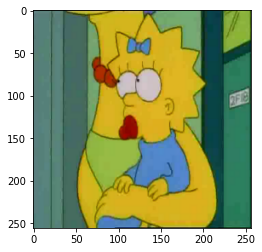

Predicted class: homer_simpson, real class: maggie_simpson


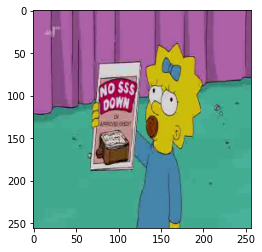

Predicted class: homer_simpson, real class: maggie_simpson


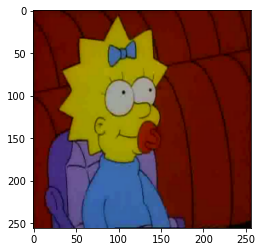

Predicted class: bart_simpson, real class: maggie_simpson


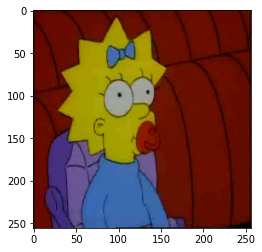

Predicted class: bart_simpson, real class: maggie_simpson


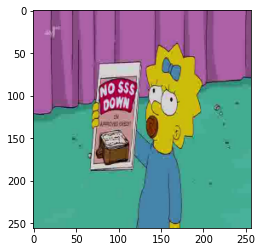

Predicted class: homer_simpson, real class: maggie_simpson


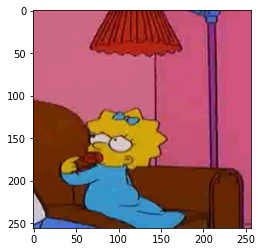

Predicted class: bart_simpson, real class: maggie_simpson


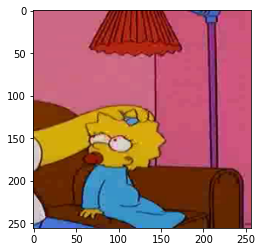

Predicted class: bart_simpson, real class: maggie_simpson


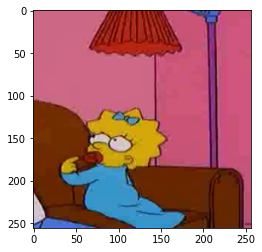

Predicted class: bart_simpson, real class: maggie_simpson


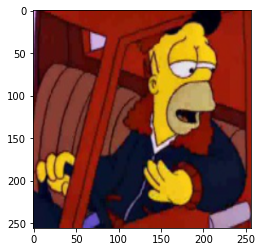

Predicted class: homer_simpson, real class: homer_simpson


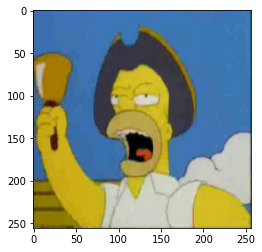

Predicted class: homer_simpson, real class: homer_simpson


In [ ]:
predictions_test_ds = model.predict(ds_tf)

y_pred = []
y_true = []
i = 0
for img, label in ds_tf:
    y_true.append(classes_family[label.numpy()[0]])
    y_pred.append(classes[np.argmax(predictions_test_ds[i])])
    if i < 10:
        plt.imshow(img[0])
        plt.show()
        print(f"Predicted class: {classes[np.argmax(predictions_test_ds[i])]}, real class: {classes_family[label.numpy()[0]]}")
    i = i + 1
    

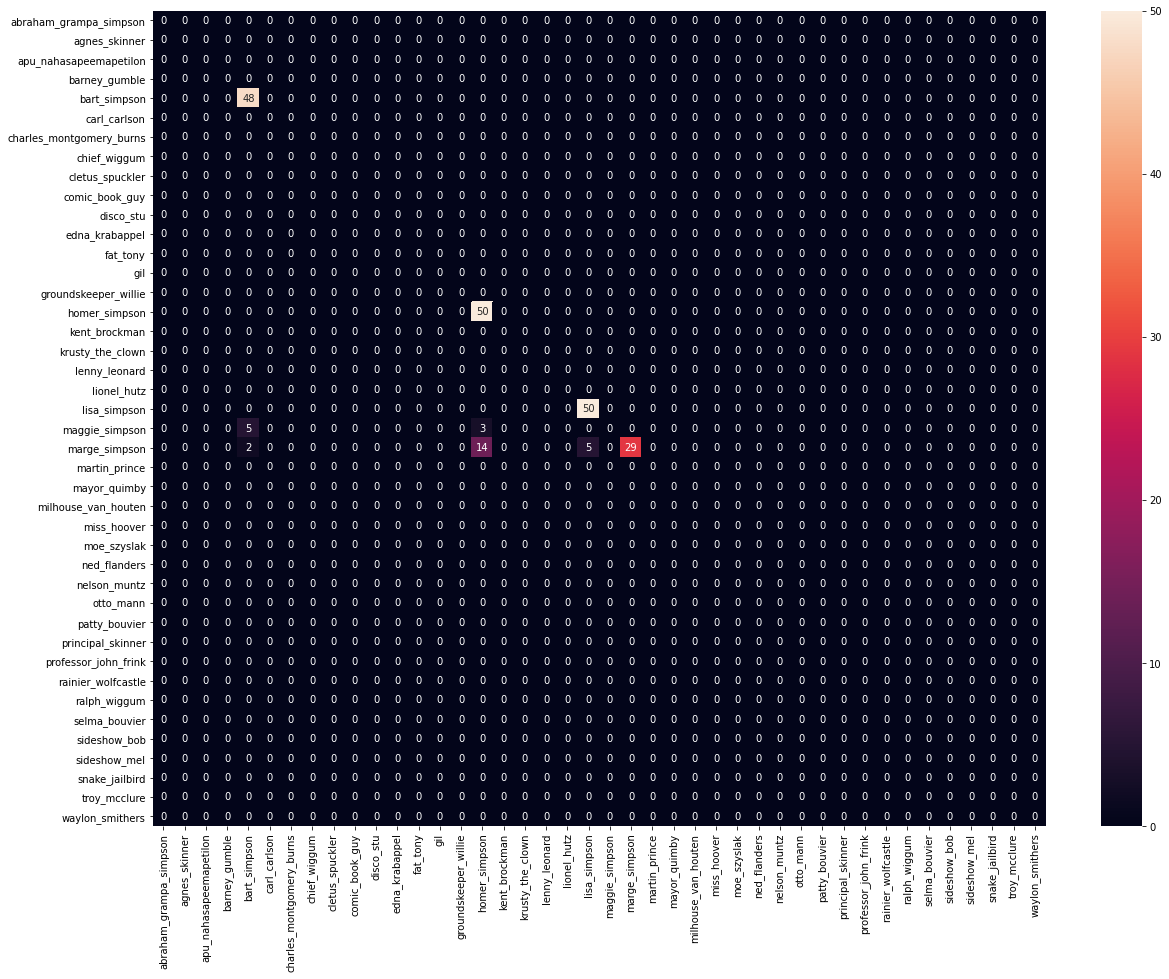

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=classes)
df_cm = pd.DataFrame(cm, index = classes, columns = classes)
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [ ]:
# model.evaluate(test_ds)

636/636 [==============================] - 2s 3ms/step - loss: 9.4513 - accuracy: 0.7264


[9.451284408569336, 0.7264150977134705]

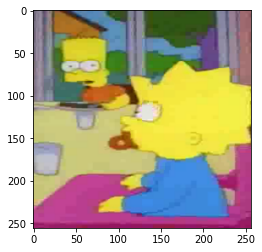

Predicted class: lisa_simpson, real class: maggie_simpson


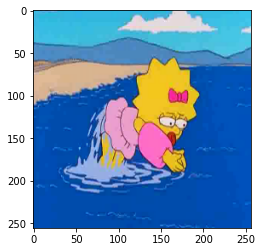

Predicted class: bart_simpson, real class: maggie_simpson


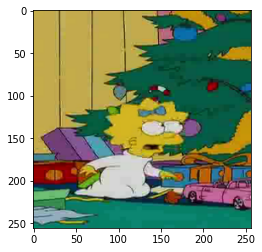

Predicted class: homer_simpson, real class: maggie_simpson


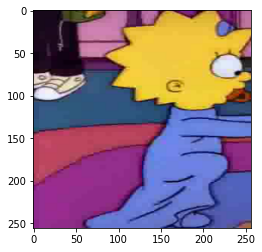

Predicted class: homer_simpson, real class: maggie_simpson


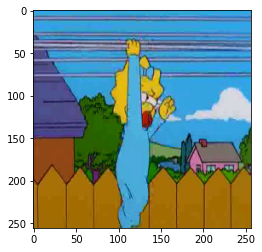

Predicted class: lisa_simpson, real class: maggie_simpson


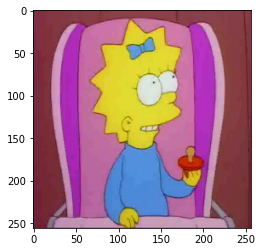

Predicted class: bart_simpson, real class: maggie_simpson


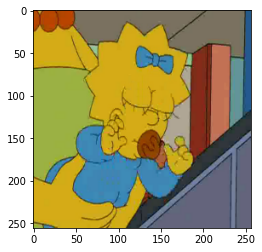

Predicted class: lisa_simpson, real class: maggie_simpson


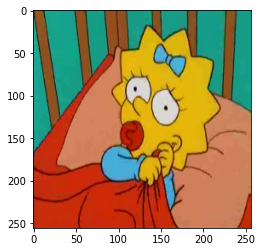

Predicted class: homer_simpson, real class: maggie_simpson


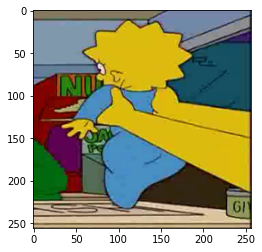

Predicted class: homer_simpson, real class: maggie_simpson


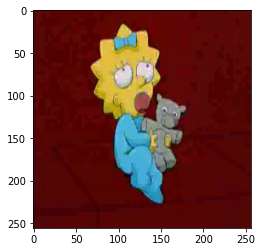

Predicted class: bart_simpson, real class: maggie_simpson


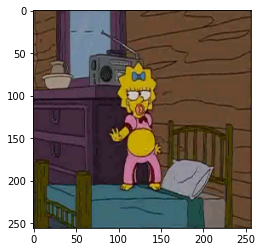

Predicted class: lisa_simpson, real class: maggie_simpson


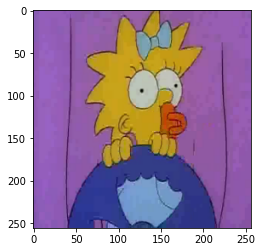

Predicted class: bart_simpson, real class: maggie_simpson


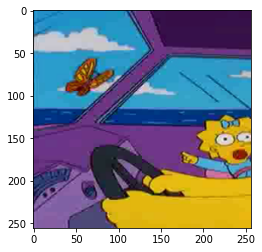

Predicted class: homer_simpson, real class: maggie_simpson


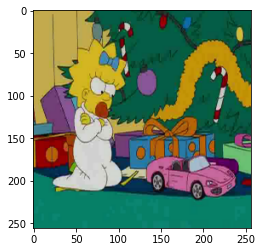

Predicted class: lisa_simpson, real class: maggie_simpson


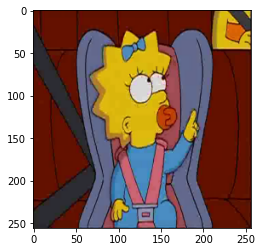

Predicted class: homer_simpson, real class: maggie_simpson


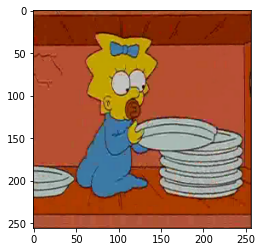

Predicted class: lisa_simpson, real class: maggie_simpson


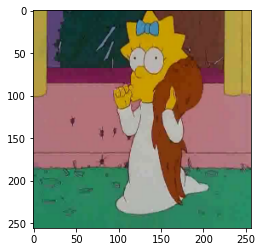

Predicted class: lisa_simpson, real class: maggie_simpson


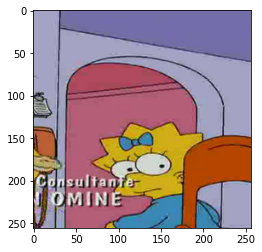

Predicted class: homer_simpson, real class: maggie_simpson


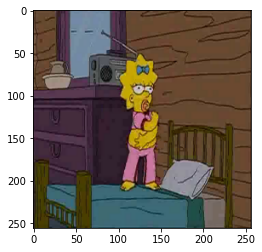

Predicted class: bart_simpson, real class: maggie_simpson


In [ ]:
# predictions_test_ds = model.predict(test_ds)

# y_pred = []
# y_true = []
# i = 0
# for img, label in test_ds:
#     y_true.append(classes[label.numpy()[0]])
#     y_pred.append(classes[np.argmax(predictions_test_ds[i])])
#     i = i + 1
#     if i < 20:
#         plt.imshow(img[0])
#         plt.show()
#         print(f"Predicted class: {classes[np.argmax(predictions_test_ds[i])]}, real class: {classes[label.numpy()[0]]}")



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=classes)
df_cm = pd.DataFrame(cm, index = classes, columns = classes)

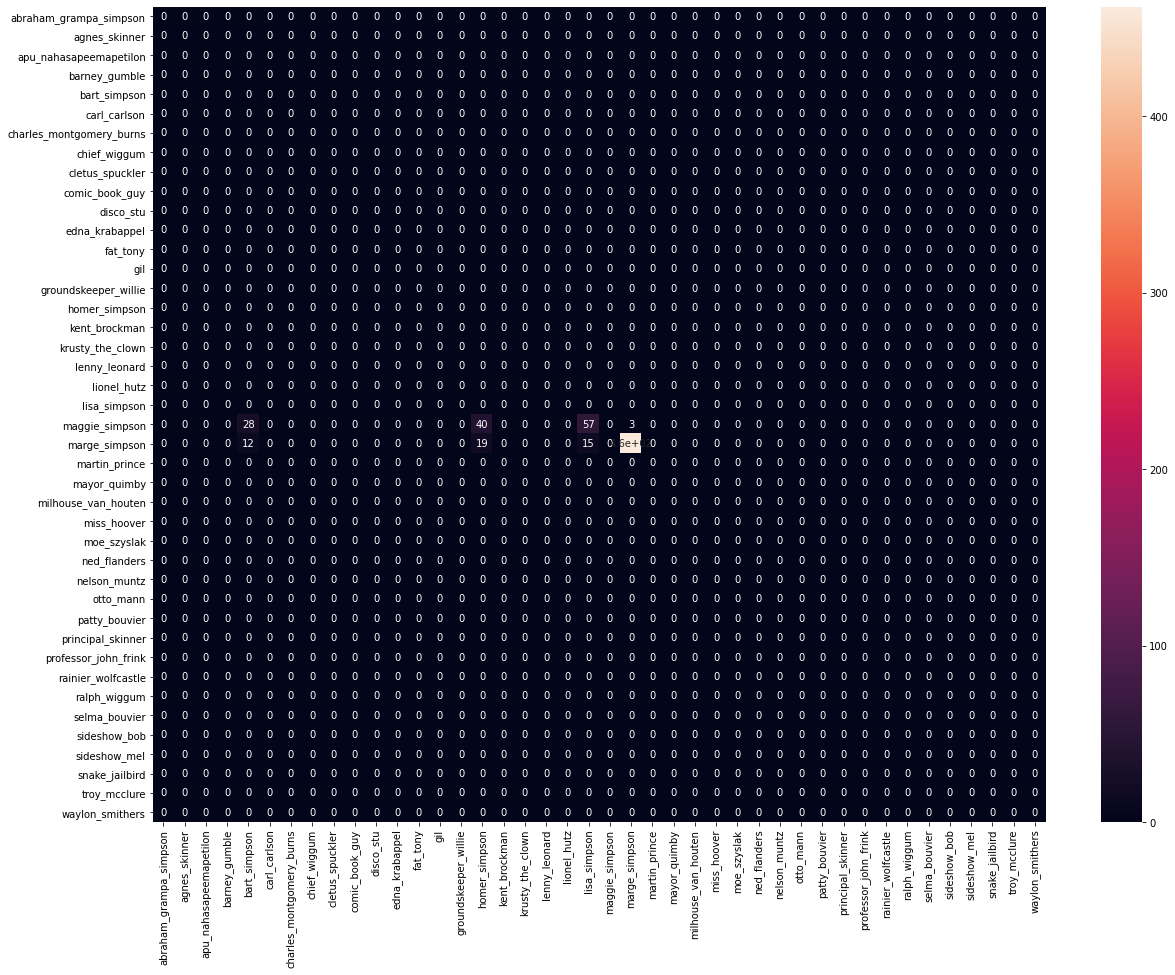

In [ ]:
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)